In [253]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal


df = pd.read_csv('loans_full_schema.csv')

1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 


Machine learning is applying different methods on data to achieve three different things: draw causal insights, predict future events better, and understand patterns in data. 

When to use Machine Learning: 

When the company performing the Machine Learning has lots of reliable and accessible data. The team in place also needs to be able to efficiently and effectively scrub the data and preprocess it to be reliable since unreliable data can give useless results and cost more in the long run. They need to thoroughly understand the data. 
    It should be used for large amounts of data. 
    If there are actionable changes that the company can make based on the ML model and those changes come with savings greater than what was spent on building the model. 
    You can’t code the rules because there are too many factors
    The scale is too large for a human to do
    When simple approaches are not able to answer the question
    
When not to use Machine Learning:  
        If any of the reasons above to do ML don’t fit the situation, like a small amount of data, you can code the rules, or the data team doesn’t have the expertise to deal with it. There are times when a simpler approach will be able to solve the problem. Or if the cost of building a ML model will outweigh the benefits of the information gained from the model. 


2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.  
    

In [254]:
df.head()
print(df.columns)
print(df.dtypes)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

Transferring ordinal data to nominal. Grade is the grade associated with the loan. It is given an letter grade with order. This changes the grade column to a nominal value. 


In [255]:
#sticking with minimal preprocessing. If we are learning more techniques next week I'd definitely rather wait to learn them. 

df.head()
df['grade']

#nominal values
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
df['grade']=class_labels.fit_transform(df['grade'].values)
df

#df['grade'].dtypes



,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


 Taking Care of Missing Values. Joint information NaNs are replaced by the single information. Technique shameless gained from office hours and Mrudula

In [256]:
df.loc[df['annual_income_joint'].isnull(), 'annual_income_joint']= df.loc[df['annual_income_joint'].isnull(), 'annual_income']
df.loc[df['verification_income_joint'].isnull(), 'verification_income_joint']= df.loc[df['verification_income_joint'].isnull(), 'verified_income']
df.loc[df['debt_to_income_joint'].isnull(), 'debt_to_income_joint']= df.loc[df['debt_to_income_joint'].isnull(), 'debt_to_income']

df

#df['initial_listing_status'].unique()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,Verified,18.01,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,Not Verified,5.04,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,Source Verified,21.15,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,Not Verified,10.16,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,Source Verified,22.28,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,Verified,32.38,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,Source Verified,11.99,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Dropping the emp_title column. I don't see a good way to quantify it so it is going. 

In [257]:
df.drop('emp_title', axis = 1)

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,Verified,18.01,0,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,Not Verified,5.04,0,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,Source Verified,21.15,0,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,Not Verified,10.16,0,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,Source Verified,22.28,0,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,Verified,32.38,4,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,Source Verified,11.99,0,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [258]:
df.isna().sum()
#for future options - what can we do about months_since_last_delinq etc

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                    0
verification_income_joint              0
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

I'm not sure if this is the right approach. One hot encode the homeownership field. 

In [259]:
df['homeownership'].unique()
#df.columns


df[['homewonership_mortgage', 'homeownership_own', 'homewonership_rent']] = pd.get_dummies(df['homeownership'])
#df

#print(df.columns.tolist())
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homewonership_mortgage,homeownership_own,homewonership_rent
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,Verified,18.01,...,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,Not Verified,5.04,...,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,Source Verified,21.15,...,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,Not Verified,10.16,...,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,Source Verified,22.28,...,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,0,0,1
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,Verified,32.38,...,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,1,0,0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,1,0,0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,Source Verified,11.99,...,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,1,0,0


In [260]:
#df.iloc[:, 30:40]


In [261]:
df.isna().sum()


emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                    0
verification_income_joint              0
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.


Each colored rectangle shows the correlation between the variables represented on each axis, ranging from -1 to 1. The closer you get to zero, the less linear trend there is between the two. The more positively correlated, (they increase togeteher) the closer to zero and the stronger the relationship. The more negatively correlated (one increases, other decreases), the closer to negative one it gets.

We can see some of the features are pretty strongly positively correlated like delinquencies and past due accounts, grade and interest rate,  and paid total and paid principle.
Some have no correlation like number of active debit accounts and total credit utilized, total credit lines and inquiries last 12 months, and balance and total credit utilized. 
Some have strong negative correlation like account never delinq percent and delinq 2y and months since last credit inquiry and inquiries last 12 months. 



In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

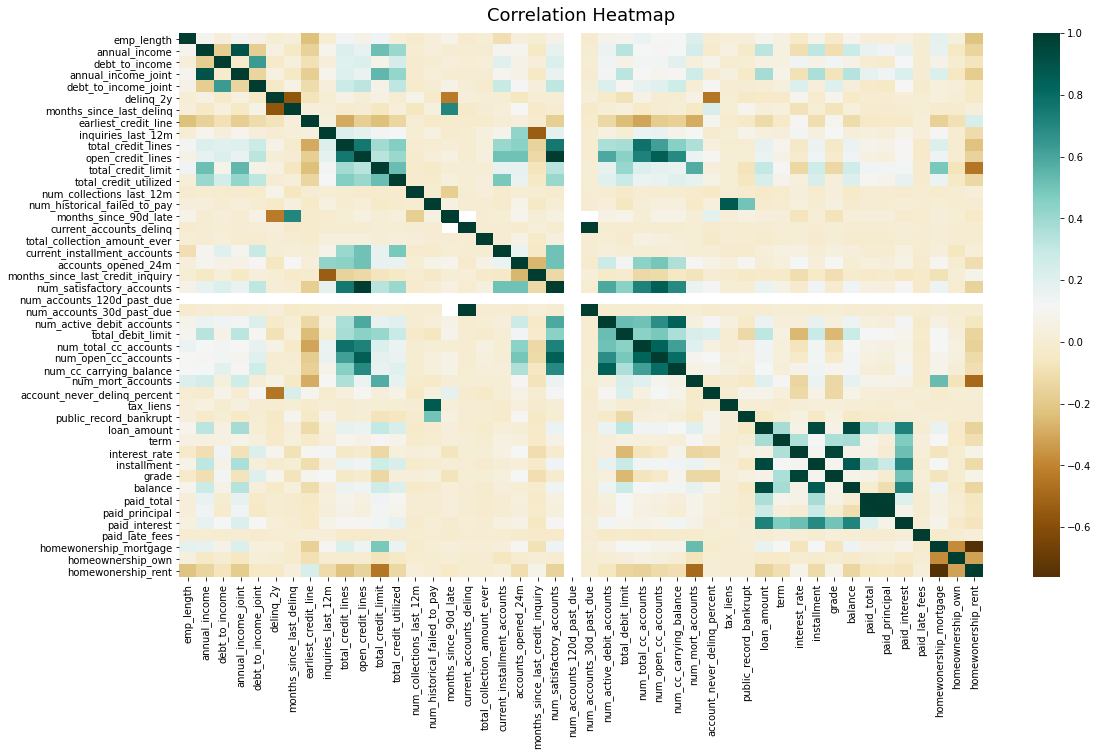

In [263]:
df.corr()
plt.figure(figsize=(18, 10))
#heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap = sns.heatmap(df.corr(),cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 


The internet tells me that the proper bin size is the number of datapoints square rooted and rounded up. In this case that would have been 100. That was too many so I cut it in half. Then I cut it in half again. 

The x axis is the loan amount and the y axis is the frequency. Each bin reprents how many loans are within that bin width (loan amount range).


array([[<AxesSubplot:title={'center':'loan_amount'}>]], dtype=object)

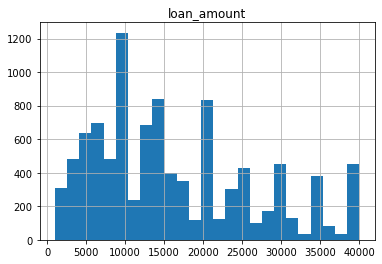

In [264]:
df.hist(column='loan_amount', bins = 25)

5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

a.	Is there a better way to do this than with a lambda? 
    There is probably a better way to do just about everything I do in Python. Non lambda version below. 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 
    For lambda it was 15.6ms. The non lambda version was 37.8 ms. The lambda version was less than half the time. 

In [265]:
df['state'].nunique()
#was kind of hoping not every state was represented. 

50

In [266]:
#%%time
#mostly taken from https://www.businessinsider.com/regions-of-united-states-2018-5#-and-the-west-4
state_code = {
'northeast' :  {'MA', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'},
'pacific' : {'ID',  'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI'},
'plains' :{'MT', 'ND', 'SD', 'WY',  'NE', 'KS' , 'CO',  'TX', 'OK', 'NM'},
'midwest' :  {'OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO',  },
'south' : {'DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN' , 'GA', 'FL', 'AL', 'MS', 'AR', 'LA' }}

#Function to split up states to region - thank you Mrudula in Slack
to_region=(lambda x: "Plains"  if x in plains else ("Midwest" if x in midwest else ("Pacific" if x in pacific else ("South" if x in south else "Northeast"))) )
df['region']= df['state'].apply(to_region)
df





,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homewonership_mortgage,homeownership_own,homewonership_rent,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,Verified,18.01,...,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,Not Verified,5.04,...,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,Source Verified,21.15,...,Cash,1824.63,281.80,175.37,106.43,0.0,0,0,1,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,Not Verified,10.16,...,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,Source Verified,22.28,...,Cash,21586.34,2969.80,2413.66,556.14,0.0,0,0,1,Plains
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,Verified,32.38,...,Cash,9147.44,1456.31,852.56,603.75,0.0,1,0,0,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Cash,27617.65,4620.80,2382.35,2238.45,0.0,1,0,0,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,Source Verified,11.99,...,Cash,21518.12,2873.31,2481.88,391.43,0.0,1,0,0,Midwest


In [267]:
#%%time
def to_region_2(state):
    state_code = {
    'northeast' :  {'MA', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'},
    'pacific' : {'ID',  'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI'},
    'plains' :{'MT', 'ND', 'SD', 'WY',  'NE', 'KS' , 'CO',  'TX', 'OK', 'NM'},
    'midwest' :  {'OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO',  },
    'south' : {'DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN' , 'GA', 'FL', 'AL', 'MS', 'AR', 'LA' }}
    if state in state_code['northeast']:
        return 'Northeast'
    if state in state_code['pacific']:
        return 'Pacific'
    if state in state_code['plains']:
        return 'Plains'
    if state in state_code['midwest']:
        return 'Midwest'
    else:
        return 'South'

df['region_2']= df['state'].apply(to_region_2)
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homewonership_mortgage,homeownership_own,homewonership_rent,region,region_2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,Verified,18.01,...,27015.86,1999.33,984.14,1015.19,0.0,1,0,0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,Not Verified,5.04,...,4651.37,499.12,348.63,150.49,0.0,0,0,1,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,Source Verified,21.15,...,1824.63,281.80,175.37,106.43,0.0,0,0,1,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,Not Verified,10.16,...,18853.26,3312.89,2746.74,566.15,0.0,0,0,1,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,Pacific,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,Source Verified,22.28,...,21586.34,2969.80,2413.66,556.14,0.0,0,0,1,Plains,Plains
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,Verified,32.38,...,9147.44,1456.31,852.56,603.75,0.0,1,0,0,Northeast,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,27617.65,4620.80,2382.35,2238.45,0.0,1,0,0,Northeast,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,Source Verified,11.99,...,21518.12,2873.31,2481.88,391.43,0.0,1,0,0,Midwest,Midwest


6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

They do all seem to follow a similar distribution, smaller loan amounts have a larger frequency. The midwest and plains are strangely similar. According to the website I went to to classify the states in the south has the most amount of states so it makes sense they have more loans. 

<function matplotlib.pyplot.show(close=None, block=None)>

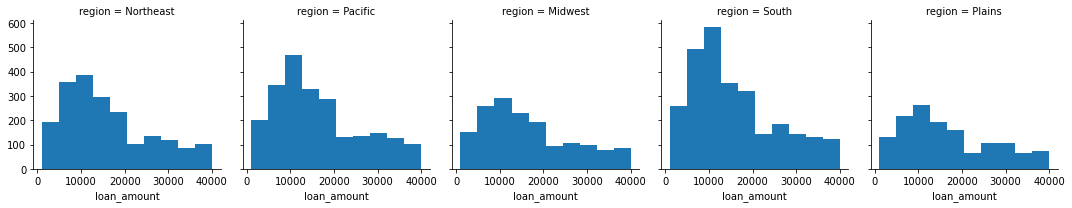

In [268]:

#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(df, col='region')
g.map(plt.hist, 'loan_amount')
plt.show